# EDA on eCommerce Transactions Dataset

Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load datasets

In [4]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("product.csv")
transactions = pd.read_csv("transactions.csv")

In [6]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
# inspect dataset

print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [10]:
# drop duplicates from datasets

customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

In [11]:
# merge dataset for a single view

merged_dataset = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Display a preview of the merged dataset
merged_data_head = merged_dataset.head(10)

# Basic summary statistics to get an overview of the data
summary_stats = merged_dataset.describe(include="all")

# Checking for missing values in the merged dataset
missing_values = merged_dataset.isnull().sum()



In [12]:
merged_data_head


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,Anna Ball,South America,2022-05-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,Jeremy Mclaughlin,South America,2024-09-17,ComfortLiving Bluetooth Speaker,Electronics,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,David Li,North America,2024-01-13,ComfortLiving Bluetooth Speaker,Electronics,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,Miguel Wong,North America,2024-01-30,ComfortLiving Bluetooth Speaker,Electronics,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,Robert Jones,South America,2023-04-19,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [13]:
summary_stats

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000,1000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN,199,4,178,66,4,NaN
top,T00001,C0156,P059,2024-08-25 12:38:23,NaN,NaN,NaN,William Adams,South America,2022-04-16,ActiveWear Smartwatch,Books,NaN
freq,1,11,19,1,NaN,NaN,NaN,11,304,19,40,270,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407,NaN,NaN,NaN,NaN,NaN,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639,NaN,NaN,NaN,NaN,NaN,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000,NaN,NaN,NaN,NaN,NaN,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000,NaN,NaN,NaN,NaN,NaN,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000,NaN,NaN,NaN,NaN,NaN,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000,NaN,NaN,NaN,NaN,NaN,404.40000


In [14]:
missing_values

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [15]:
merged_data = merged_dataset.rename(columns={
    "Price_x": "TransactionPrice",
    "Price_y": "ProductBasePrice"
})


In [16]:
# Check if TransactionPrice and ProductBasePrice are identical
price_comparison = merged_data['TransactionPrice'] == merged_data['ProductBasePrice']
identical_prices = price_comparison.all()

# Output result
if identical_prices:
    print("TransactionPrice and ProductBasePrice are identical.")
else:
    print("TransactionPrice and ProductBasePrice have differences.")
    

TransactionPrice and ProductBasePrice are identical.


In [17]:
# Drop the redundant column
merged_data = merged_data.drop(columns=["ProductBasePrice"])

# Rename the remaining TransactionPrice column to Price
merged_data = merged_data.rename(columns={"TransactionPrice": "Price"})

# Confirm the updated column names
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


#  Regional Revenue insights

## <font color='blue'>Business Insight 1:
#### South America leads in revenue and order volumes, indicating a strong market presence and customer base.
This region should be a prime target for future marketing investments and expansion strategies.
#### North America has a high number of orders (244) but the lowest average order value.
This suggests customers are making smaller purchases.
Introduce combo offers and loyalty programs to encourage customers to spend more per order.

In [18]:
# Regional revenue analysis
regional_revenue = merged_data.groupby('Region')['TotalValue'].agg(['sum', 'count', 'mean']).round(2)
regional_revenue = regional_revenue.rename(columns={'sum': 'Total Revenue', 
                                                  'count': 'Number of Orders',
                                                  'mean': 'Average Order Value'})
print("Regional Performance:\n", regional_revenue)

Regional Performance:
                Total Revenue  Number of Orders  Average Order Value
Region                                                             
Asia               152074.97               218               697.59
Europe             166254.63               234               710.49
North America      152313.40               244               624.24
South America      219352.56               304               721.55


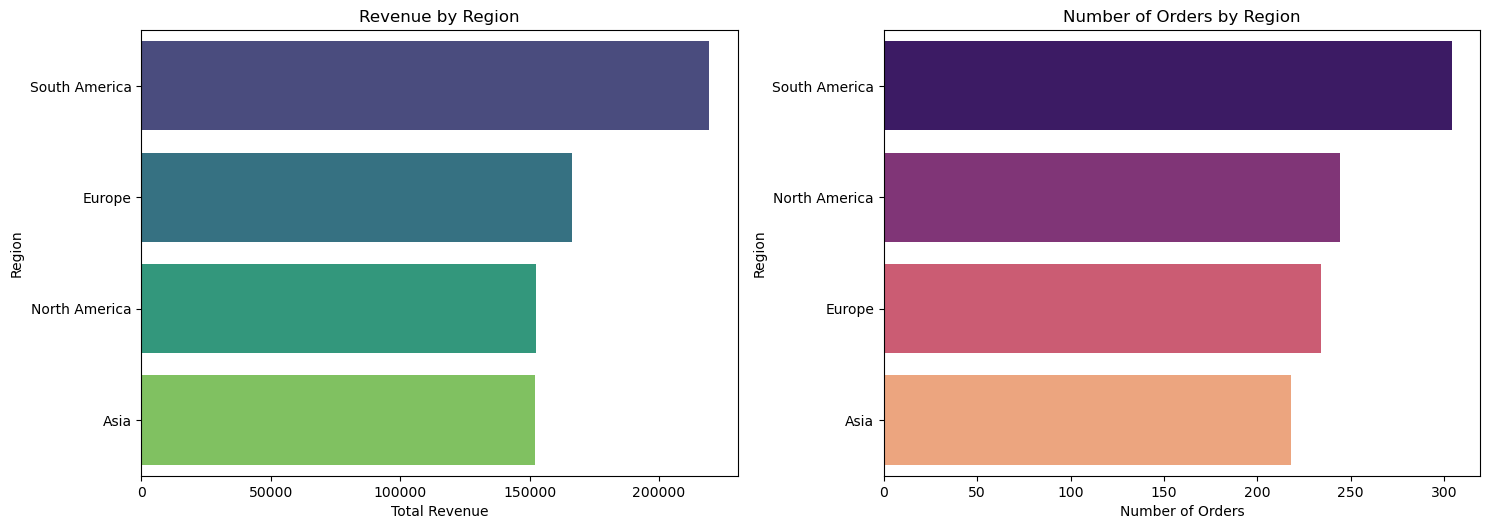

In [19]:
plt.figure(figsize=(15, 10))

# Regional Revenue Plot
plt.subplot(2, 2, 1)
regional_rev = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=regional_rev.values, y=regional_rev.index, palette='viridis')
plt.title('Revenue by Region')
plt.xlabel('Total Revenue')

# Orders by Region
plt.subplot(2, 2, 2)
region_orders = merged_data.groupby('Region').size().sort_values(ascending=False)
sns.barplot(x=region_orders.values, y=region_orders.index, palette='magma')
plt.title('Number of Orders by Region')
plt.xlabel('Number of Orders')

plt.tight_layout()
plt.show()

# Category performance 

## <font color='blue'>Business Insight 2:
#### Books dominate in revenue, units sold, and transactions:
Books are the top-performing category. Evaluate customer preferences to understand what drives this success (e.g., specific genres, pricing, or customer demographics).
Apply similar strategies, like targeted promotions or bundling, to boost the performance of other categories.
#### Home Decor has a low AOV despite good sales:
While Home Decor shows consistent demand, the average order value is low. Try increasing AOV by offering upselling opportunities or bundling related products together for higher-value purchases.
Consider introducing premium options or limited editions to encourage higher spend.

In [20]:
# Category performance metrics
category_metrics = merged_data.groupby('Category').agg({
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum',
    'TransactionID': 'count'
}).round(2)

category_metrics.columns = ['Total Revenue', 'Avg Order Value', 'Units Sold', 'Number of Transactions']
print("\nCategory Performance:\n", category_metrics)


Category Performance:
              Total Revenue  Avg Order Value  Units Sold  \
Category                                                  
Books            192147.47           711.66         681   
Clothing         166170.66           728.82         590   
Electronics      180783.50           711.75         627   
Home Decor       150893.93           608.44         639   

             Number of Transactions  
Category                             
Books                           270  
Clothing                        228  
Electronics                     254  
Home Decor                      248  


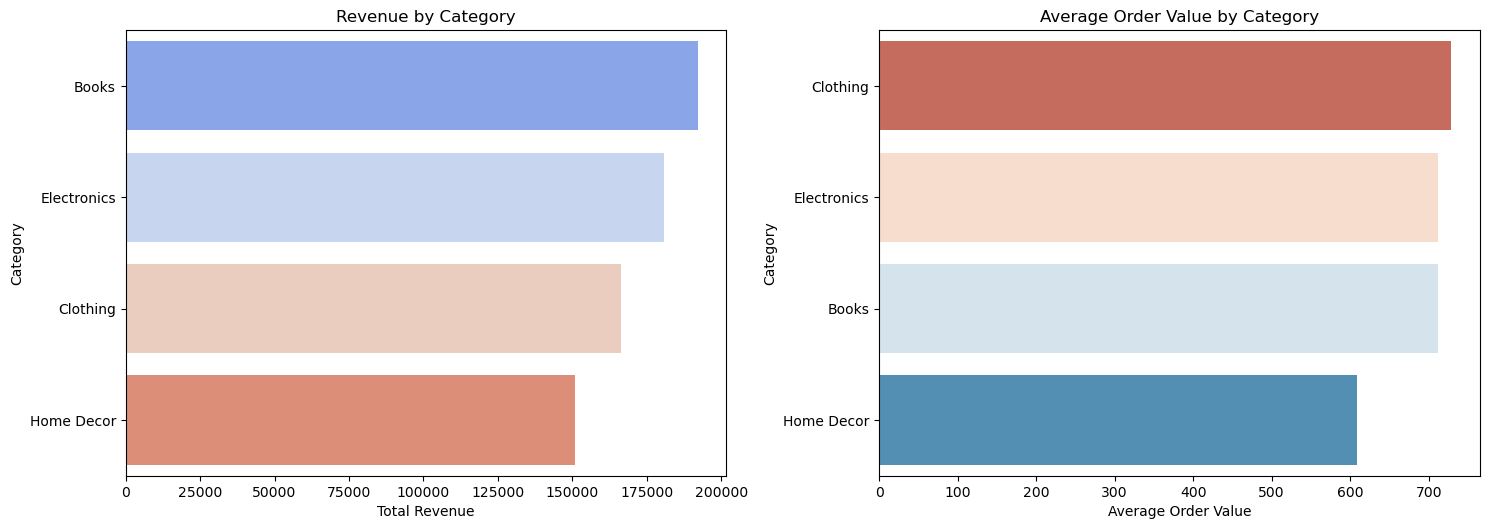

In [21]:
plt.figure(figsize=(15, 10))

# Category Revenue
plt.subplot(2, 2, 1)
cat_rev = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=cat_rev.values, y=cat_rev.index, palette='coolwarm')
plt.title('Revenue by Category')
plt.xlabel('Total Revenue')

# Average Order Value by Category
plt.subplot(2, 2, 2)
cat_avg = merged_data.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
sns.barplot(x=cat_avg.values, y=cat_avg.index, palette='RdBu')
plt.title('Average Order Value by Category')
plt.xlabel('Average Order Value')

plt.tight_layout()
plt.show()

# Customer Purchase Distrubution

## <font color='blue'>Business Insight 3:
#### High spenders have a strong impact:
Focus on premium services and exclusive products.
Personalize the customer experience to retain high-value customers.
Create VIP memberships or loyalty perks to enhance their experience.
#### Most customers make only 1-2 purchases:
Implement a loyalty program to encourage repeat purchases.
Offer rewards like discounts, points, or special promotions for frequent buyers.
Design incentives that build long-term customer relationships and boost retention.
    
    
    

In [36]:
# Customer purchasing patterns
customer_metrics = merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).round(2)

customer_metrics['Average Order Value'] = (customer_metrics['TotalValue'] / customer_metrics['TransactionID']).round(2)
print("\nCustomer Metrics:\n", customer_metrics.describe())


Customer Metrics:
        TransactionID    TotalValue    Quantity  Average Order Value
count     199.000000    199.000000  199.000000           199.000000
mean        5.025126   3467.314372   12.748744           687.580101
std         2.198340   1832.677958    6.151060           237.936708
min         1.000000     82.360000    1.000000            82.360000
25%         3.000000   2162.040000    8.500000           542.940000
50%         5.000000   3137.660000   12.000000           677.210000
75%         6.000000   4770.225000   17.000000           828.625000
max        11.000000  10673.870000   32.000000          1323.130000


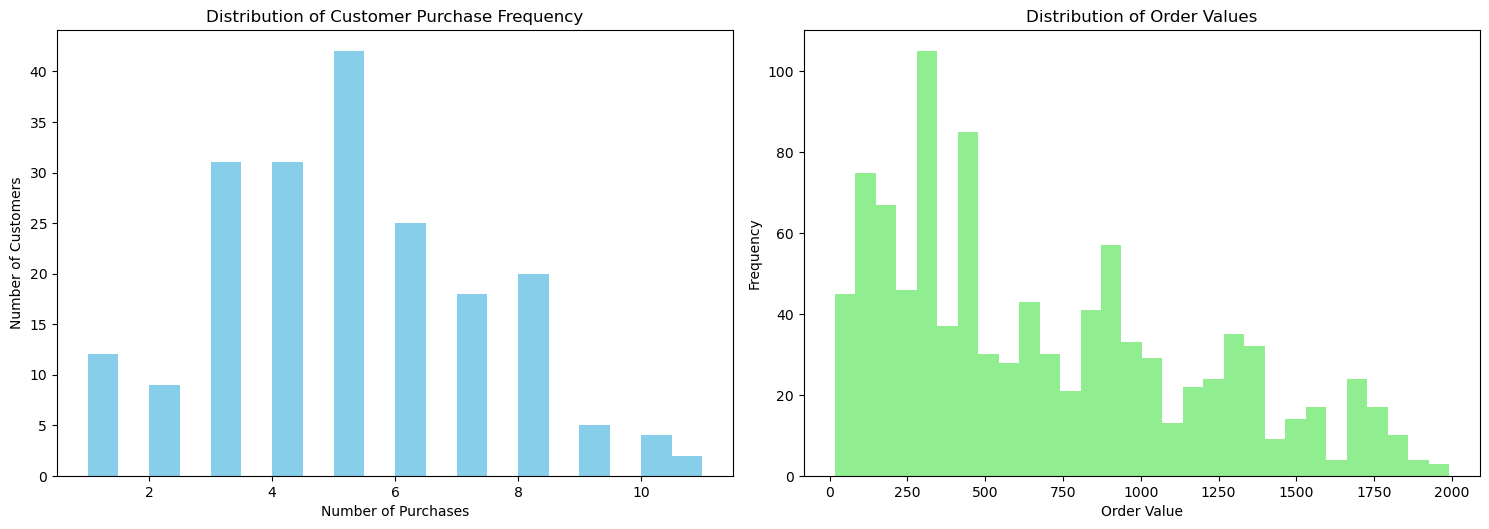

In [23]:
plt.figure(figsize=(15, 10))

# Customer Purchase Distribution
plt.subplot(2, 2, 1)
customer_purchases = merged_data.groupby('CustomerID').size()
plt.hist(customer_purchases, bins=20, color='skyblue')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')

# Order Value Distribution
plt.subplot(2, 2, 2)
plt.hist(merged_data['TotalValue'], bins=30, color='lightgreen')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Monthly Sales Trends

# <font color='blue'>Business Insight 4:
#### Focus on High-Performing Months:
Strengthen marketing campaigns for top-performing categories like Books and Electronics during their peak months (January, March, and December).
Offer discounts or product bundles to maximize revenue during these high-demand periods.
#### Boost Off-Season Sales:
For categories like Clothing and Home Decor, target months with lower activity (e.g., May and November).
Use special promotions, product launches, or exclusive offers to maintain customer interest and increase sales during the off-season.

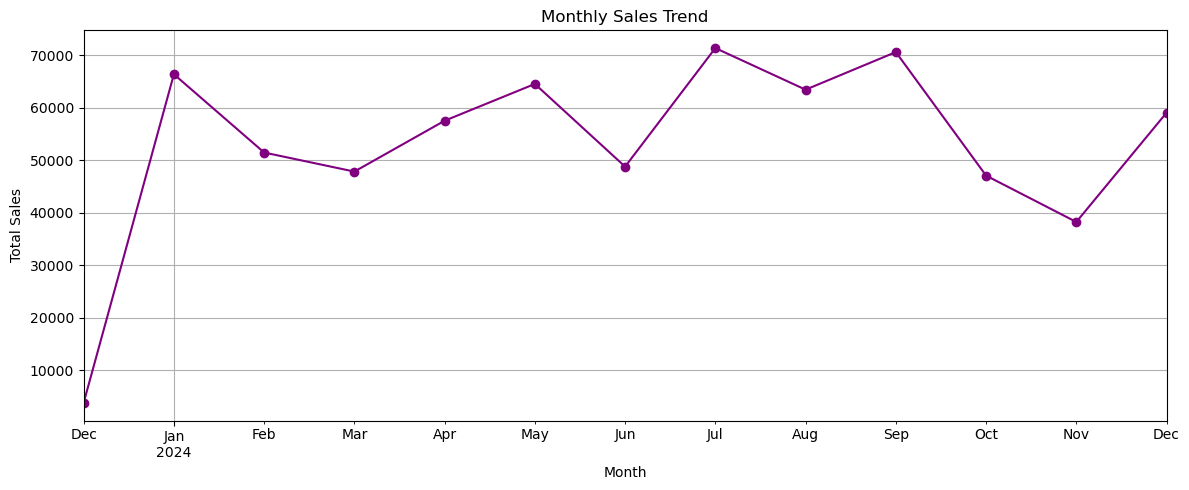

In [24]:
plt.figure(figsize=(12, 5))

# Monthly Sales Trend
merged_data['Month'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)


plt.tight_layout()
plt.show()

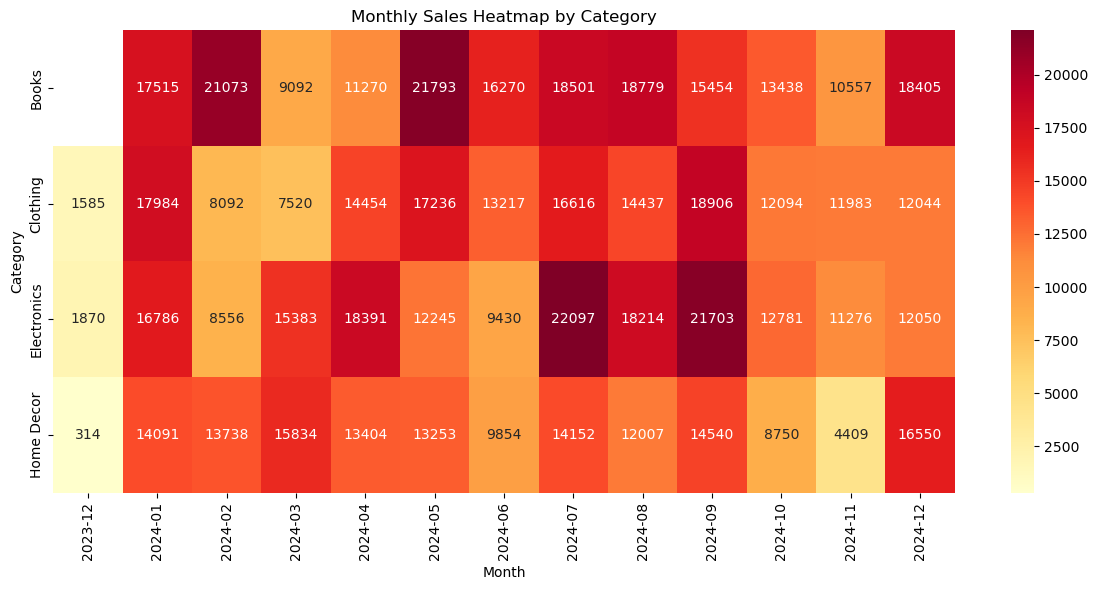

In [40]:
# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_cat_sales.T, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Monthly Sales Heatmap by Category')
plt.tight_layout()
plt.show()


# Product Revenue Statistics

# <font color='blue'>Business Insight 5:
#### Maximize Revenue from High-Performing Products:
    
   

* ActiveWear and SoundWave products, especially the ActiveWear Smartwatch, lead in revenue and sales.
* Try bundling cheaper items with premium products to boost overall sales.
* Manage inventory efficiently for top-selling items to avoid stockouts.
* Promote higher-priced products to enhance their visibility and further increase sales.

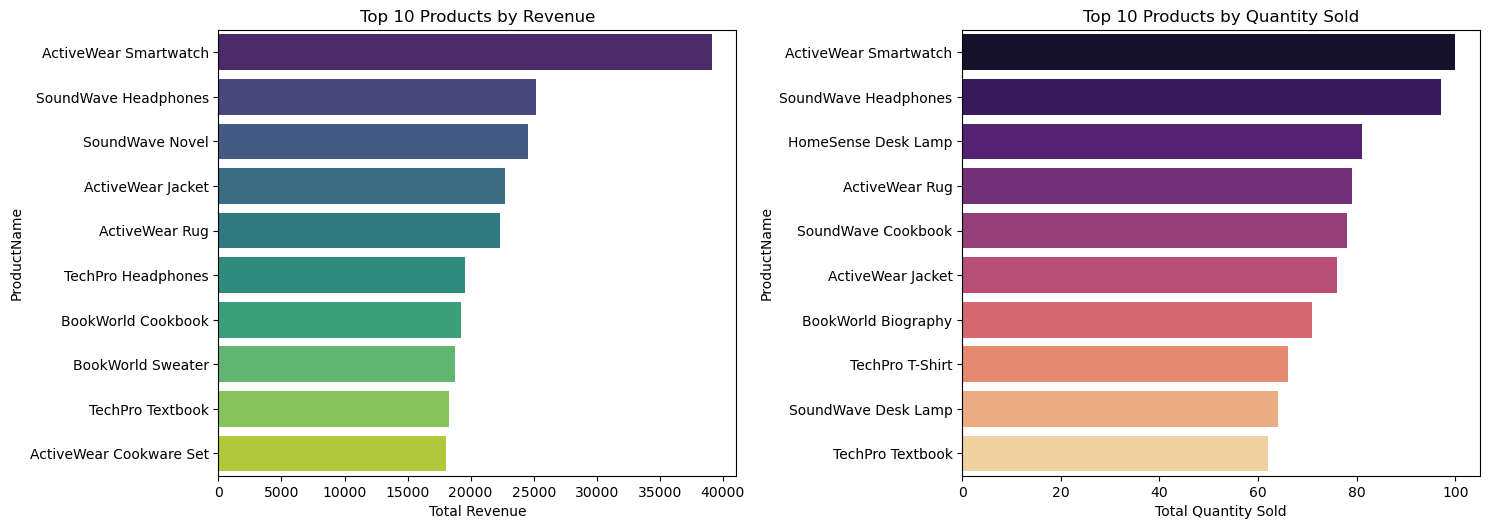

In [25]:
plt.figure(figsize=(15, 10))

# Top Products by Revenue
plt.subplot(2, 2, 1)
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')

# Top Products by Quantity
plt.subplot(2, 2, 2)
top_qty = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_qty.values, y=top_qty.index, palette='magma')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [43]:
product_stats = merged_data.groupby('ProductName').agg({
   'TotalValue': ['sum', 'mean', 'count'],
   'Quantity': 'sum'
}).round(2)

product_stats.columns = ['Total Revenue', 'Avg Order Value', 'Number of Orders', 'Total Quantity']
product_stats = product_stats.sort_values('Total Revenue', ascending=False)

print("Top 10 Products by Revenue:")
print(product_stats.head(10))
print("\n")

# Quantity Statistics
qty_stats = merged_data.groupby('ProductName').agg({
   'Quantity': ['sum', 'mean', 'count'],
   'TotalValue': ['mean', 'sum']
}).round(2)

qty_stats.columns = ['Total Units', 'Avg Units/Order', 'Number of Orders', 'Avg Revenue/Order', 'Total Revenue']
qty_stats = qty_stats.sort_values('Total Units', ascending=False)

print("Top 10 Products by Quantity:")
print(qty_stats.head(10))

# Correlation between quantity and revenue
correlation = merged_data.groupby('ProductName').agg({
   'Quantity': 'sum',
   'TotalValue': 'sum'
}).corr()

print("\nCorrelation between Quantity and Revenue:")
print(correlation)

Top 10 Products by Revenue:
                         Total Revenue  Avg Order Value  Number of Orders  \
ProductName                                                                 
ActiveWear Smartwatch         39096.97           977.42                40   
SoundWave Headphones          25211.64           663.46                38   
SoundWave Novel               24507.90          1225.40                20   
ActiveWear Jacket             22712.56           873.56                26   
ActiveWear Rug                22314.43           769.46                29   
TechPro Headphones            19513.80          1147.87                17   
BookWorld Cookbook            19221.99           961.10                20   
BookWorld Sweater             18743.79           986.52                19   
TechPro Textbook              18267.96           730.72                25   
ActiveWear Cookware Set       18083.73           861.13                21   

                         Total Quantity  
Produ

# SUMMARY

<font color='green'>**Analysis reveals South America as the revenue leader, while North America needs Avg Order Value improvement despite high order volume. Books dominate across metrics, with Home Decor requiring upselling strategies. Customer data shows a contrast between high-value VIP customers and single-purchase majority, suggesting need for retention focus. Seasonal peaks in January, March, and December, combined with strong performance of ActiveWear and SoundWave products, indicate opportunities for targeted promotions and strategic product bundling to optimize sales performance.**